### Task 1 
 
### To Explore Supervised Machine Learning

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### 1) Importing the Required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda7\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2) Reading the CSV dataset from the Url given below

https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

### Display the top 5 records of the Data

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analysis

### 3) check how many Rows and Columns are present in the dataset

In [3]:
data.shape

(25, 2)

### 4) A breif derscription about the dataset

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 5) Information of null whether the features contain null values or not and also tells the datatype of the features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 6) To find the correlation amoung the features

In [6]:
correlation = data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### 7) To visualise the correlation Map using seaborn's Heatmap

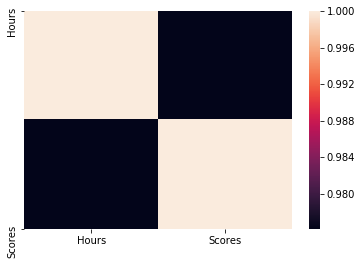

In [7]:
sns.heatmap(correlation)

### 8) Plotting the distribution of scores

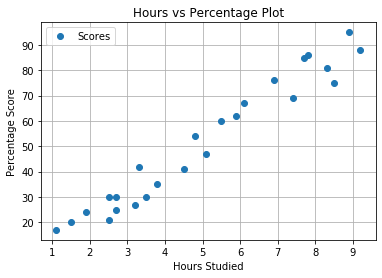

In [8]:
data.plot(x='Hours', y='Scores', style="o",grid='bool')  
plt.title('Hours vs Percentage Plot')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### 9) Data prepartion

### Spllitiing up the data into Dependent and independent features

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Model Building

### 10) Implementing Train test split

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### 11) Import Linear Regression from sklearn and here we fit the model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Traning has been completed")

Traning has been completed


### 12) To visualize the points with the Best fit line

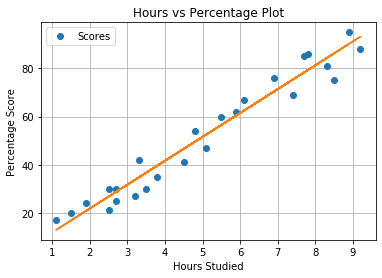

In [14]:
bestfitline = lr.coef_ * X + lr.intercept_
data.plot(x='Hours', y='Scores', style="o",grid='bool')  
plt.title('Hours vs Percentage Plot')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.plot(X,bestfitline)
plt.show()

### 13) Predicting the model

In [15]:
y_pred = lr.predict(X_test)

### 14) Creating a Dataframe to represent the Actual and predicted values

In [16]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Reshaping the dataset features X and y

In [17]:
X = X.reshape(-1,1)
y = y.reshape (-1,1)

### 15) Predicting the score When the Hours = 9.25

In [18]:
prediction = lr.predict([[9.25]])
prediction

array([93.69173249])

### 16) Calculating the performance of the model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [20]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',
      mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.598769307217456


In [21]:
from sklearn.metrics import r2_score
print('R square value is:',
     r2_score(y_test, y_pred))

R square value is: 0.9454906892105354
